# sklearn - Linear Regression With Time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('data/sales_data.csv')
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [23]:
df.dtypes

Years     object
Sales    float64
dtype: object

## Data Preprocessing

In [25]:
df['Years'] = pd.to_datetime(df['Years'])        # object -> datetime64
df['time'] = np.arange(1,73,1)                   # new col
df['month_name'] = df['Years'].dt.month_name()   # new col
df.head()

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


### split the data into train and test

In [6]:
# Step-1: Split the data into train (4 years) and test (2 years)
df_train = df.head(48) # 4 years
df_test = df.loc[48:] # 2 years

x_train = df_train[['time']].values
y_train = df_train['Sales'].values

x_test = df_test[['time']].values
y_test = df_test['Sales'].values

,Years,Sales,time,month_name
43,2004-08-01,431.8,44,August
44,2004-09-01,330.2,45,September
45,2004-10-01,330.2,46,October
46,2004-11-01,304.8,47,November
47,2004-12-01,292.1,48,December


# Linear Regression with Time
- Trend in the data

In [11]:
from sklearn.linear_model import LinearRegression

model_trend = LinearRegression()
model_trend.fit(x_train,y_train)

LinearRegression()

In [12]:
y_fittedvalue = model_trend.predict(x_train)

In [13]:
y_forecast = model_trend.predict(x_test)

**confidence interval - 95% = 1.96**

CI = $\mu +- ME $

- ME = z * SE
- z = 1.96 (for 95% CI)
- SE = standard deviation of the error

In [14]:
# confidence interval
# mean +- Margin of error
error = y_train - y_fittedvalue
se = error.std()
ME = 1.96 * se

C:\Users\cti110016\AppData\Local\Temp\ipykernel_23376\1037205557.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(df_test['Years'],y_forecast,'b',color='red')


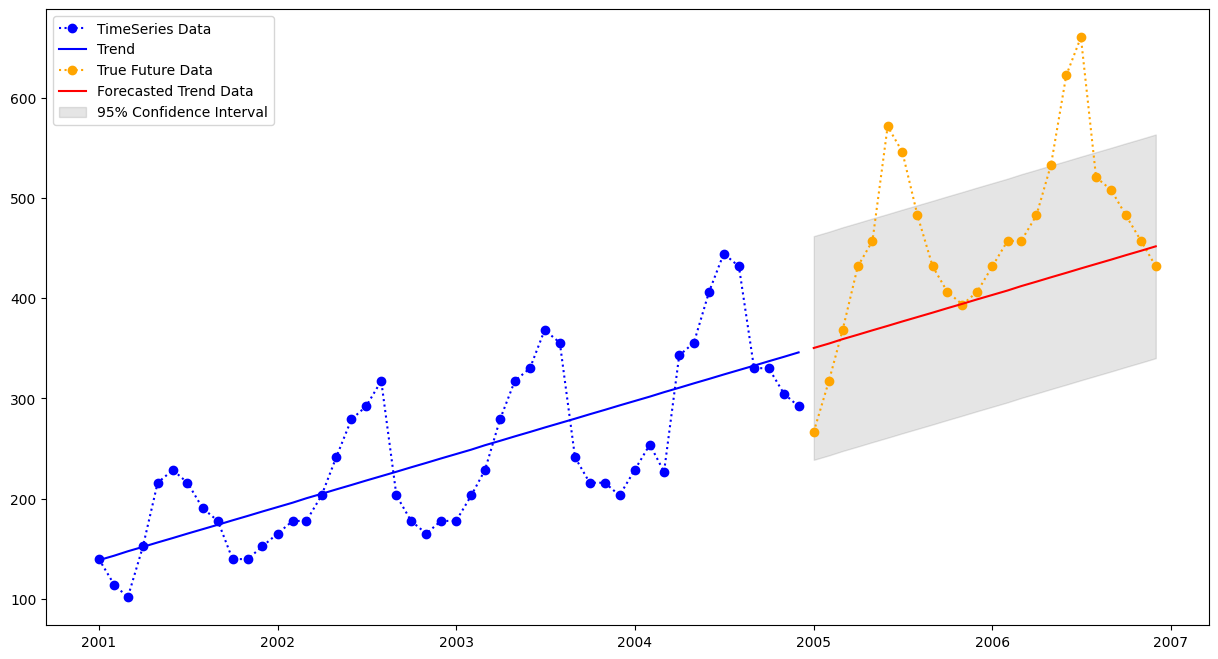

In [15]:
# visualize the data
plt.figure(figsize=(15,8))
plt.plot(df_train['Years'],y_train,'bo:')
plt.plot(df_train['Years'],y_fittedvalue,'b')
# forecasted data
plt.plot(df_test['Years'],y_test,'o:',color='orange')
plt.plot(df_test['Years'],y_forecast,'b',color='red')
# margin of error
ci_plus = y_forecast + ME
ci_minus = y_forecast - ME
plt.fill_between(df_test['Years'],(ci_plus),(ci_minus),alpha=0.1,color='black')


plt.legend(['TimeSeries Data','Trend','True Future Data','Forecasted Trend Data','95% Confidence Interval'])
plt.show()

In [16]:
# 2006-01-01	431.8	61
forecast_mean = model_trend.predict(np.array([[61]]))

In [17]:
print(forecast_mean)
print((forecast_mean - ME , forecast_mean + ME))

[403.28613765]
(array([291.67694148]), array([514.89533381]))


## Additive Model

In [18]:
df_train.head()

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [19]:
df_train['month_name'][0]

'January'

TypeError: scatterplot() got multiple values for argument 'data'

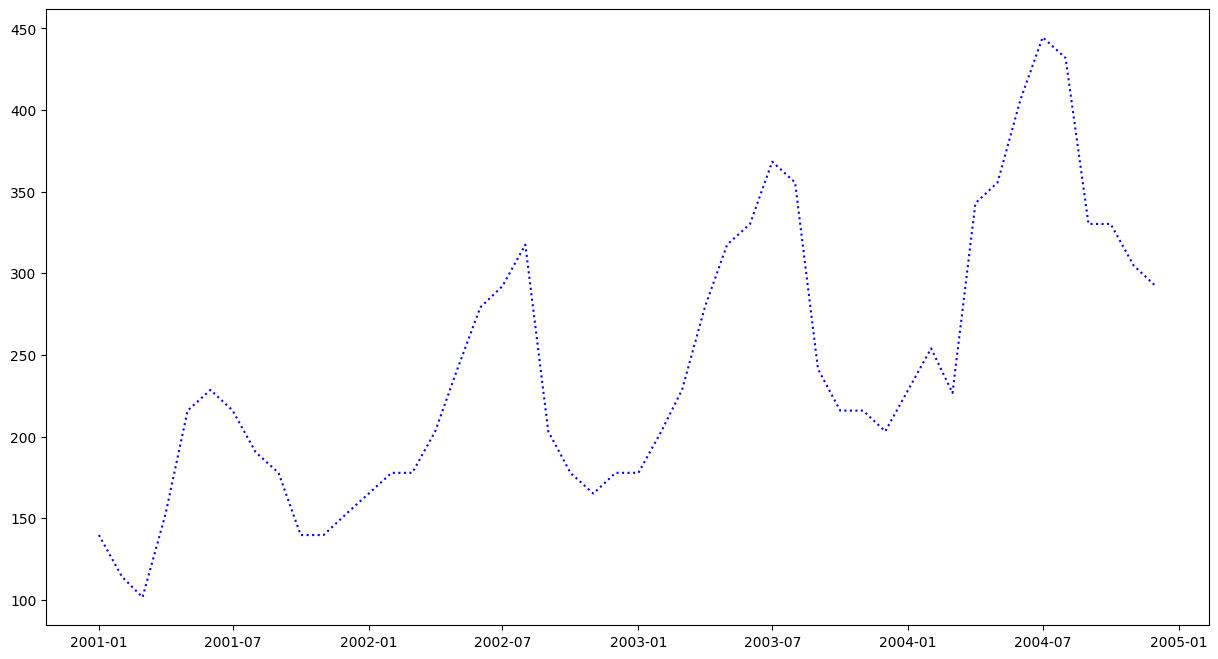

In [26]:
plt.figure(figsize=(15,8))
#plt.scatter(df_train['Years'],df_train['Sales'])
plt.plot(df_train['Years'],df_train['Sales'],'b:')
sns.scatterplot('Years','Sales',data=df_train,s=200,hue='month_name',palette='Set1')

for i in range(len(df_train)):
    plt.text(df_train['Years'][i],df_train['Sales'][i],df_train['month_name'][i])

seasonality is 12 hence we need to create n-1 dummies , 11 columns

In [ ]:
dum = pd.get_dummies(df_train['month_name'],drop_first=True)
df_train1 = df_train.copy()
df_train1 = pd.concat((df_train1,dum),axis=1)

In [ ]:
df_train1.head()

In [ ]:
dum = pd.get_dummies(df_test['month_name'],drop_first=True)
df_test1 = df_test.copy()
df_test1 = pd.concat((df_test1,dum),axis=1)

In [ ]:
df_test1

In [ ]:
df_train1

In [ ]:
# split the data into independent and dependent
cols =['time','August'	,'December',	'February',	'January',	'July',	'June',	'March','May'	,'November'	,'October',	'September']
x_train_add = df_train1[cols].values
x_test_add = df_test1[cols].values
y_train_add = df_train1['Sales'].values
y_test_add = df_test1['Sales'].values

In [ ]:
x_train_add.shape, x_test_add.shape, y_train_add.shape, y_test_add.shape

**Additive Model (Linear Regression)**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_add = LinearRegression()
model_add.fit(x_train_add,y_train_add)

In [ ]:
# fitted values
y_fittedvalue_add = model_add.predict(x_train_add)
# forecasted values
y_forecast_add = model_add.predict(x_test_add)

In [ ]:
# margin of error
# ME = 1.96* SE
error = y_train_add - y_fittedvalue_add
SE = error.std()
ME = 1.96 * SE

In [ ]:
# visualize the data
plt.figure(figsize=(15,8))
plt.plot(df_train1['Years'],y_train_add,'bo:')
plt.plot(df_train1['Years'],y_fittedvalue_add,'c')
# forecasted data
plt.plot(df_test1['Years'],y_test_add,'o:',color='orange')
plt.plot(df_test1['Years'],y_forecast_add,'b',color='red')
# margin of error
ci_plus = y_forecast_add + ME
ci_minus = y_forecast_add - ME
plt.fill_between(df_test1['Years'],(ci_plus),(ci_minus),alpha=0.1,color='black')


plt.legend(['TimeSeries Data','Fitted Additive Model','True Future Data','Forecasted Additive Model Data','95% Confidence Interval'])
plt.show()

# Multiplicative Model for Forecasting

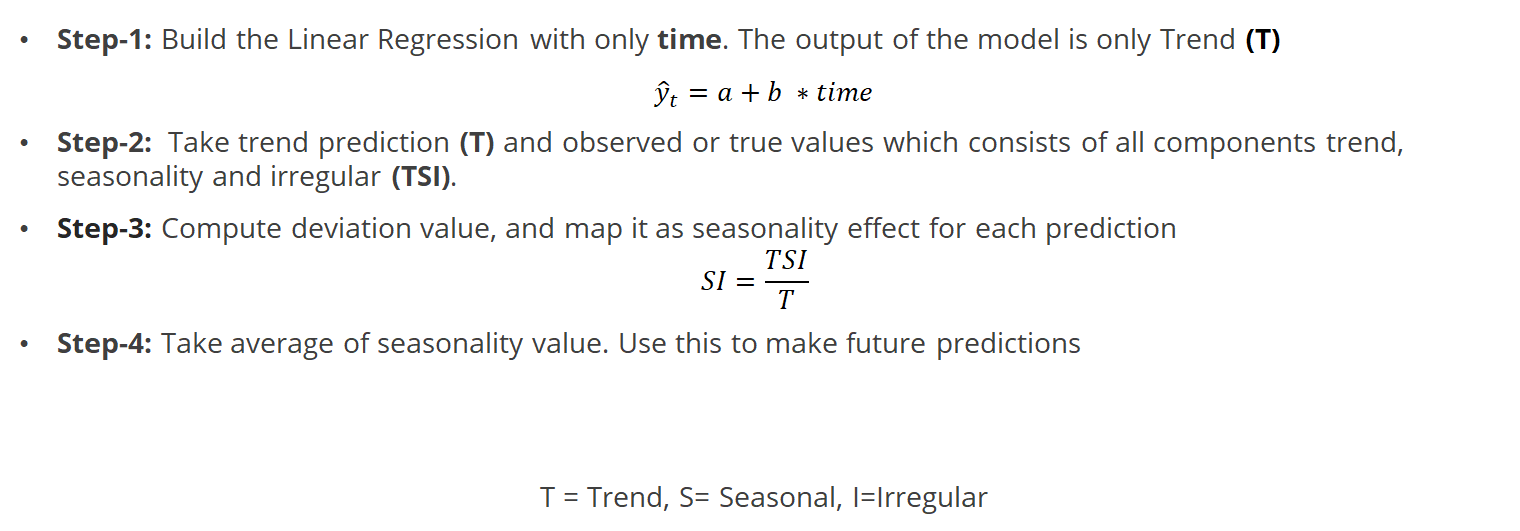

In [ ]:
df_train.tail()

In [ ]:
df_test.head()

**Step-1: Linear Regression with time and Sales**

In [ ]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [ ]:
X_t = df_train2[['time']].values
y_true_mul = df_train2['Sales'].values

X_t.shape, y_true_mul.shape

In [ ]:
X_t_test = df_test2[['time']].values
y_true_test_mul = df_test2['Sales'].values

X_t_test.shape, y_true_test_mul.shape

In [ ]:
from sklearn.linear_model import LinearRegression
model_trend_mul = LinearRegression()
model_trend_mul.fit(X_t,y_true_mul)

**Step-2: Take Trend (T) and TSI (True Sample)**

In [ ]:
y_fittedvalues_trend = model_trend_mul.predict(X_t)

In [ ]:
df_train2['predicted_T'] = y_fittedvalues_trend
df_train2.head()

**Step-3: Deviation to TSI**

SI = $\frac{TSI}{ T}$

In [ ]:
df_train2['SI'] = df_train2['Sales'] / df_train2['predicted_T']
df_train2.head(20)

**Step-4: Avg Seasonal Deviation**

In [ ]:
deviation_season = df_train2[['month_name','SI']].groupby(by='month_name').mean().rename(columns={'SI':'correction_factor'})
deviation_season

**Step-5: Computing the Fitted Values**

In [ ]:
df_train2 = df_train2.merge(deviation_season,on='month_name')

In [ ]:
df_train2.head()

In [ ]:
df_train2['Fitted_values'] = df_train2['predicted_T'] * df_train2['correction_factor']

In [ ]:
df_train2.head()

**Forecasting**

In [ ]:
ftrend = model_trend_mul.predict(X_t_test)
df_test2['Forecasted_Trend']= ftrend 
df_test2.head()

In [ ]:
df_test2 = pd.merge(df_test2,deviation_season,on='month_name')
df_test2.head()

In [ ]:
df_test2['Forecasted_mul'] = df_test2['Forecasted_Trend'] * df_test2['correction_factor']
df_test2.head()

In [ ]:
# margin error (train)
# ME = 1.96 * SE
# SE = 
error = df_train2['Sales'] - df_train2['Fitted_values']
SE = error.std()
ME = 1.96*SE
print(ME)

In [ ]:
df_train2.sort_values(by='Years',inplace=True)
df_test2.sort_values(by='Years',inplace=True)

In [ ]:
# visualize the data
plt.figure(figsize=(15,8))
plt.plot(df_train2['Years'],df_train2['Sales'],'bo:')
plt.plot(df_train2['Years'],df_train2['Fitted_values'],'c') # fitted
# forecasted data
plt.plot(df_test2['Years'],df_test2['Sales'],'o:',color='orange')
plt.plot(df_test2['Years'],df_test2['Forecasted_mul'],'b',color='red')
# margin of error
ci_plus = df_test2['Forecasted_mul'] + ME
ci_minus = df_test2['Forecasted_mul'] - ME
plt.fill_between(df_test1['Years'],(ci_plus),(ci_minus),alpha=0.1,color='black')


plt.legend(['TimeSeries Data','Fitted Multiplicative Model','True Future Data','Forecasted Multiplicative Model Data','95% Confidence Interval'])
plt.show()